### Automated Classification of Media Content (Books and Movies) as Violent or Not

### Purpose: Conduct EDA of data    

#### Input: "data_for_model.pkl" Output: Graphs plotted inline

### Imports Packages and Modules

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


### Loading Data

In [2]:
# read the data
DataDir = '..\\DataFiles\\'
df = pd.read_pickle(DataDir + "data_for_model.pkl")
df.shape

(11421, 32)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11421 entries, 0 to 11420
Data columns (total 32 columns):
adult_content_ratings                     11421 non-null int32
age                                       11421 non-null int64
consumerism_ratings                       11421 non-null int32
drugs_ratings                             11421 non-null int32
entity_type                               11421 non-null object
language                                  7760 non-null object
language_ratings                          11421 non-null int32
positive_messages_ratings                 11421 non-null int32
sub_type                                  11415 non-null object
title                                     11421 non-null object
train_summary                             11421 non-null object
violence                                  9601 non-null object
violence_ratings                          11421 non-null int32
adult_content_ratings_bin                 11421 non-null int64
consu

### Plot 1: - Distribution of Books and Movies Ratings and Binary Classifications 
#### Note: Ratings 0 and 1 from commonsensemedia site have been classified as 0 - Non Violent and ratings 2,3,4,5 as 1- having violent content 

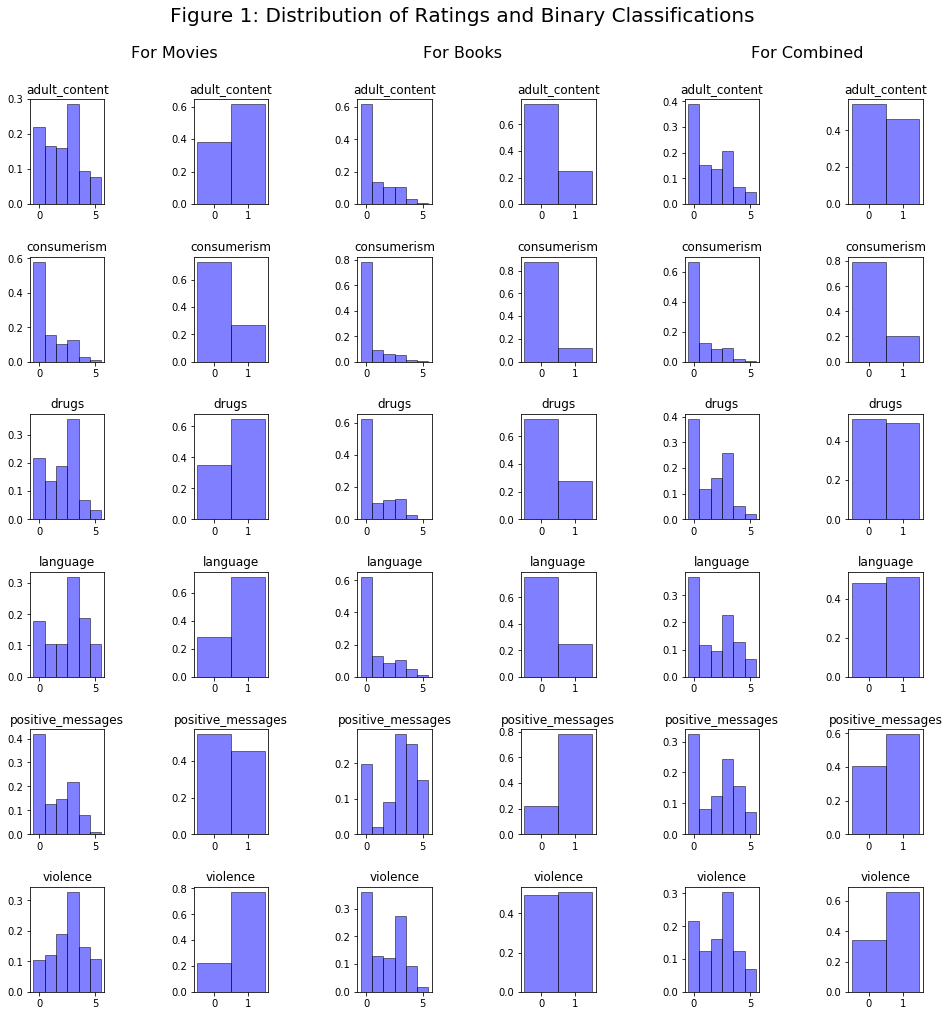

In [3]:
#get distribution of ratings for each dimension
rating_cols = ['adult_content', 'consumerism', 'drugs', 
               'language', 'positive_messages', 
               'violence']

fig, ax = plt.subplots(nrows=len(rating_cols), ncols = 6, figsize = (16,16), 
                       gridspec_kw={'wspace': 1.2, 'hspace': 0.5})
#fig.set_size_inches(8,11)

for row,c in enumerate(rating_cols):
    for col,entity in enumerate(['Movie','Book']):
        ax[row,2*col].hist(df[df['entity_type']== entity][c+'_ratings'] ,bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5],
                 facecolor = 'blue', alpha = 0.5, ec='black' , density = True)
        ax[row,2*col].set_title(c)     

        ax[row,2*col+1].hist(df[df['entity_type']== entity][c+'_ratings_bin'], bins=[-0.5,0.5,1.5],
                 facecolor = 'blue', alpha=0.5, ec='black' , density = True)
        ax[row,2*col+1].set_title(c)
        
    ax[row,4].hist(df[c+'_ratings'], [-0.5,0.5,1.5,2.5,3.5,4.5,5.5],
             facecolor = 'blue', alpha=0.5, ec='black' , density = True)
    ax[row,4].set_title(c)
    ax[row,5].hist(df[c+'_ratings_bin'], bins=[-0.5,0.5,1.5],
                 facecolor = 'blue', alpha=0.5, ec='black' , density = True)
    ax[row,5].set_title(c)
        
        
fig.suptitle('Figure 1: Distribution of Ratings and Binary Classifications', size=20)
fig.subplots_adjust(top=0.90)
plt.figtext(0.25,0.94,"For Movies", va="center", ha="center", size=16)
plt.figtext(0.5,0.94,"For Books", va="center", ha="center", size=16)
plt.figtext(0.8,0.94,"For Combined", va="center", ha="center", size=16)

plt.show()
fig.savefig(DataDir + 'eda_fig1.png')
plt.close(fig)

In [67]:
df[df.train==1].groupby(['violence_ratings', 'entity_type','violence_ratings_bin'])['title'].count()

violence_ratings  entity_type  violence_ratings_bin
0                 Book         0                       1583
                  Movie        0                        614
1                 Book         0                        573
                  Movie        0                        718
2                 Book         1                        546
                  Movie        1                       1103
3                 Book         1                       1211
                  Movie        1                       1930
4                 Book         1                        399
                  Movie        1                        882
5                 Book         1                         82
                  Movie        1                        637
Name: title, dtype: int64

In [4]:
df[df.train==1].groupby(['violence_ratings_bin'])['title'].count()

violence_ratings_bin
0    3488
1    6790
Name: title, dtype: int64

### Plot 2: - Distribution of Books and Movies Summary Lengths (Number of words in each summary)

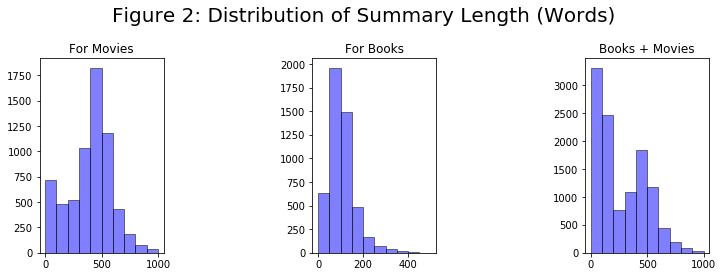

In [10]:
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = (12,4), 
                       gridspec_kw={'wspace': 1.2, 'hspace': 0.5})
ax[0].hist(df[df['entity_type']=='Movie']['clean_stop_words_free_tokens_len'], bins=10, range=(0,1000), facecolor = 'blue', alpha=0.5, ec='black')
ax[0].set_title('For Movies')
ax[1].hist(df[df['entity_type']=='Book']['clean_stop_words_free_tokens_len'], bins=10, range= (0,500), facecolor = 'blue', alpha=0.5, ec='black')
ax[1].set_title('For Books')

ax[2].hist(df['clean_stop_words_free_tokens_len'],bins=10,range=(0,1000), facecolor = 'blue', alpha=0.5, ec='black')
ax[2].set_title('Books + Movies')

fig.suptitle('Figure 2: Distribution of Summary Length (Words)', size=20)
fig.subplots_adjust(top=0.80)

plt.show()

fig.savefig(DataDir + 'eda_fig2.png')
plt.close(fig)


In [12]:
df['clean_limited_vocab_len']  = df.clean_limited_vocab_tokens.str.len()


In [17]:
#proportion of data that had less than 700 words in the summary (after removing stop words)
df[df.train==1][df.clean_limited_vocab_len<=700].shape[0]/df[df.train==1].shape[0]

C:\Users\ramba\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


0.9828760459233314

### Plot 3: - Distribution of Books and Movies Cleaned Summary Lengths

#### Note: Cleaned summary has summary with pre-processing done such as removing punctuation tags, numbers etc. 

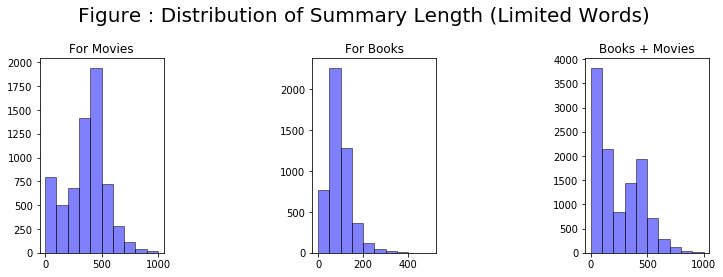

In [18]:
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = (12,4), 
                       gridspec_kw={'wspace': 1.2, 'hspace': 0.5})
clean_limited_vocab_len  = df.clean_limited_vocab_tokens.str.len()
ax[0].hist(df[df['entity_type']=='Movie']['clean_limited_vocab_len'], bins=10, range=(0,1000), facecolor = 'blue', alpha=0.5, ec='black')
ax[0].set_title('For Movies')
ax[1].hist(df[df['entity_type']=='Book']['clean_limited_vocab_len'], bins=10, range= (0,500), facecolor = 'blue', alpha=0.5, ec='black')
ax[1].set_title('For Books')

ax[2].hist(df['clean_limited_vocab_len'],bins=10,range=(0,1000), facecolor = 'blue', alpha=0.5, ec='black')
ax[2].set_title('Books + Movies')

fig.suptitle('Figure : Distribution of Summary Length (Limited Words)', size=20)
fig.subplots_adjust(top=0.80)

plt.show()

plt.close(fig)


In [25]:
#look at number of words per sample
print("Avg number of words in summary per sample:", np.mean(df['clean_summary_tokens_len']))
print("Avg number of words in summary per Movie: ", np.mean(df[df.entity_type=='Movie'].clean_summary_tokens_len))
print("Avg number of words in summary per Book: ", np.mean(df[df.entity_type=='Book'].clean_summary_tokens_len))

Avg number of words in summary per sample: 409.738814465
Avg number of words in summary per Movie:  599.023700306
Avg number of words in summary per Book:  156.118008605


### Plot 4: - Distribution of Books and Movies Sentence Counts per Summary

In [9]:
wordcounts = df['clean_stop_words_free_summary'].str.split(' ', expand=True).stack().value_counts()
# len(wordcounts)
wc = wordcounts.sort_values(ascending=False, inplace=False)[0:100]
#sentence counts
df['sentencecount'] = df['sentences'].apply(lambda x: len(x))

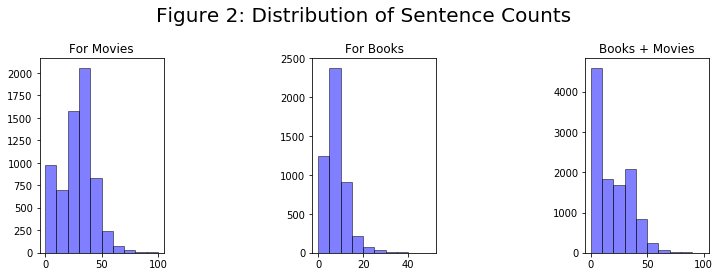

In [27]:
#get a histogram of sentence counts
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = (12,4), 
                       gridspec_kw={'wspace': 1.2, 'hspace': 0.5})
ax[0].hist(df[df['entity_type']=='Movie']['sentencecount'], bins=10, range=(0,100), facecolor = 'blue', alpha=0.5, ec='black')
ax[0].set_title('For Movies')
ax[1].hist(df[df['entity_type']=='Book']['sentencecount'], bins=10, range= (0,50), facecolor = 'blue', alpha=0.5, ec='black')
ax[1].set_title('For Books')

ax[2].hist(df['sentencecount'],bins=10,range=(0,100), facecolor = 'blue', alpha=0.5, ec='black')
ax[2].set_title('Books + Movies')

fig.suptitle('Figure 2: Distribution of Sentence Counts', size=20)
fig.subplots_adjust(top=0.80)

plt.show()

fig.savefig(DataDir + 'eda4_v2.png')
plt.close(fig)


### Plot 5: - Distribution of Books and Movies Violent vs Non-Violent Summary Lengths

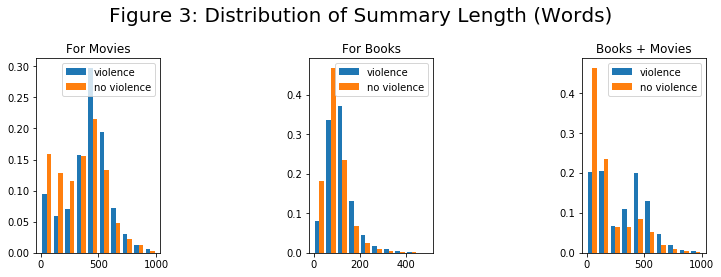

In [19]:
#get the distribution of word counts by violence type

fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = (12,4), 
                       gridspec_kw={'wspace': 1.2, 'hspace': 0.5})


m1 = df[(df.violence_ratings_bin==1) & (df.entity_type=='Movie')]['clean_stop_words_free_tokens_len']
m2 = df[(df.violence_ratings_bin==0) & (df.entity_type=='Movie')]['clean_stop_words_free_tokens_len']#
wm1 = np.ones_like(m1)/float(len(m1))
wm2 = np.ones_like(m2)/float(len(m2))

b1 = df[(df.violence_ratings_bin==1) & (df.entity_type=='Book')]['clean_stop_words_free_tokens_len']
b2 = df[(df.violence_ratings_bin==0) & (df.entity_type=='Book')]['clean_stop_words_free_tokens_len']#
wb1 = np.ones_like(b1)/float(len(b1))
wb2 = np.ones_like(b2)/float(len(b2))

mb1 = df[(df.violence_ratings_bin==1)]['clean_stop_words_free_tokens_len']
mb2 = df[(df.violence_ratings_bin==0)]['clean_stop_words_free_tokens_len']#

wmb1 = np.ones_like(mb1)/float(len(mb1))
wmb2 = np.ones_like(mb2)/float(len(mb2))
ax[0].hist([m1,m2], label = ['violence','no violence'] ,
           bins=10, range=(0,1000), weights = [wm1, wm2])
#ax[0].hist(, 
#           bins=10, range=(0,1000), facecolor = 'green', alpha=0.5, ec='black', density = True)

ax[0].set_title('For Movies')
ax[0].legend(loc="best")


ax[1].hist([b1,b2], label = ['violence','no violence'] ,
           bins=10, range=(0,500),  weights = [wb1, wb2])

# ax[1].hist(df[df['entity_type']=='Book']['clean_stop_words_free_tokens_len'], bins=10, range= (0,500), facecolor = 'blue', alpha=0.5, ec='black')
ax[1].set_title('For Books')
ax[1].legend(loc="best")


ax[2].hist([mb1,mb2], label = ['violence','no violence'] ,
           bins=10, range=(0,1000),  weights = [wmb1, wmb2])

# ax[2].hist(df['clean_stop_words_free_tokens_len'],bins=10,range=(0,1000), facecolor = 'blue', alpha=0.5, ec='black')
ax[2].set_title('Books + Movies')
ax[2].legend(loc="best")

fig.suptitle('Figure 3: Distribution of Summary Length (Words)', size=20)
fig.subplots_adjust(top=0.80)

plt.show()

fig.savefig(DataDir + 'eda_fig3.png')
plt.close(fig)
